In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import motra
import matplotlib.pyplot as plt

In [3]:
fly = motra.parse("datasets/sample.xlsx")
fly

,pos x,pos y,ori,major axis len,minor axis len,body area,fg area,img contrast,min fg dist,wing l x,...,ang_vel,min_wing_ang,max_wing_ang,mean_wing_length,axis_ratio,fg_body_ratio,contrast,dist_to_wall,fly_id,timestamp
0,783.857741,542.569038,2.704636,29.120054,10.639605,239,660,0.309538,62.817196,806.0,...,0.050744,0.034302,0.039607,1.950287,2.736949,2.761506,0.309538,3.578768,1,0.0000
1,783.493878,542.587755,2.706273,29.165685,10.884344,245,647,0.326223,61.131008,806.0,...,0.070921,0.037852,0.048828,1.969268,2.704425,2.675070,0.330280,3.578768,1,0.0333
2,783.277551,542.595918,2.710513,29.367216,10.790607,245,651,0.359137,60.299255,805.0,...,0.098216,0.038118,0.075285,1.970531,2.692419,2.651685,0.340643,3.646340,1,0.0667
3,783.553279,542.569672,2.707958,28.909874,10.921876,244,647,0.318077,62.128899,805.0,...,0.114703,0.037068,0.076717,1.961779,2.670243,2.637463,0.328618,3.578768,1,0.1000
4,783.735772,542.552846,2.702509,29.171824,10.944310,246,637,0.319184,62.817196,806.0,...,0.133684,0.038944,0.061583,1.958673,2.645382,2.614129,0.320573,3.578768,1,0.1333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,637.144981,441.546468,-2.759768,30.967822,11.280961,269,1997,0.439089,0.000000,661.0,...,0.065214,0.044437,0.055505,1.735612,2.739844,7.456729,0.434682,2.950484,2,166.4333
9992,637.209559,441.595588,-2.761370,30.919734,11.389866,272,2041,0.432655,0.000000,661.0,...,0.037891,0.044682,0.053263,1.735456,2.732109,7.462416,0.432120,2.950484,2,166.4667
9993,637.181481,441.603704,-2.762073,31.047760,11.273886,270,2003,0.424080,0.000000,661.0,...,0.058044,0.044946,0.053227,1.735631,2.746019,7.451349,0.429741,2.950484,2,166.5000
9994,637.211896,441.568773,-2.757591,31.035802,11.238755,269,2008,0.438149,0.000000,661.0,...,0.098234,0.045017,0.055372,1.734584,2.757940,7.459648,0.432327,2.950484,2,166.5333


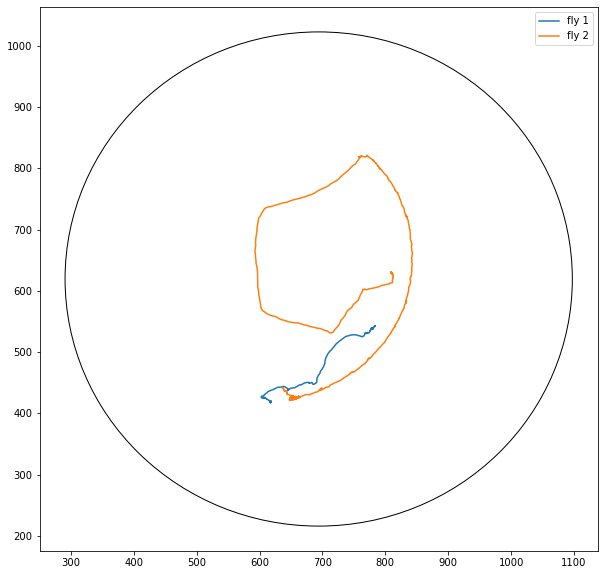

In [10]:
center, radius = motra.arena(fly)
motra.arena_trajectory(fly, center, radius)

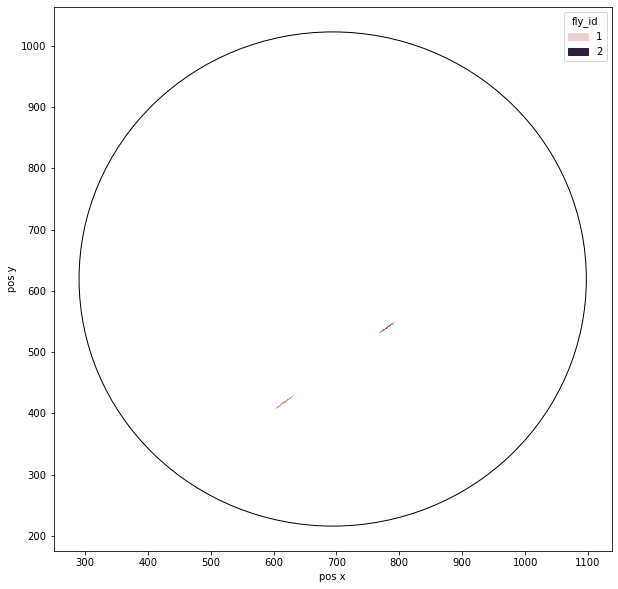

In [12]:
motra.heatmap(fly, center, radius)

In [13]:
stat = motra.stats(fly, frames=31)
stat

,fly_id,timestamp_start,timestamp_end,distance,velocity (per second)
0,1,0.0000,1.0000,4.235708,4.235708
1,1,1.0333,2.0333,4.600600,4.600600
2,1,2.0667,3.0667,2.512533,2.512533
3,1,3.1000,4.1000,2.207782,2.207782
4,1,4.1333,5.1333,3.218379,3.218379
...,...,...,...,...,...
319,2,162.0000,163.0000,5.029660,5.029660
320,2,163.0333,164.0333,3.279154,3.279154
321,2,164.0667,165.0667,3.513559,3.513559
322,2,165.1000,166.1000,4.079345,4.079345


c:\Users\hoang\Personal\work\ahmad\motra\motra\stats.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticks(), rotation=45)
c:\Users\hoang\Personal\work\ahmad\motra\motra\stats.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticks(), rotation=45)


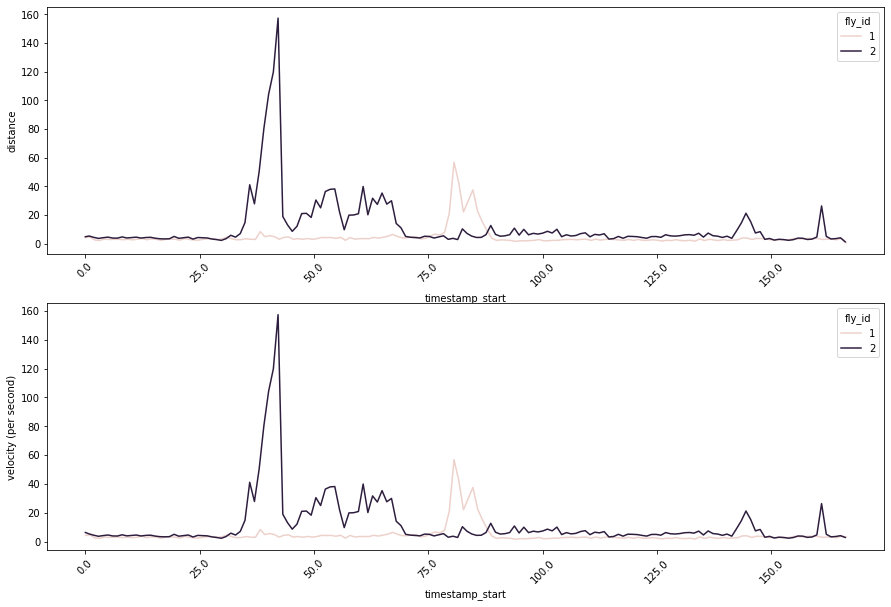

In [14]:
mod_stat = motra.visualize_stats(stat)